# Let's get to work

Here we're implementing linear regression.
Let's first discuss how it works.

# Linear Regression

Linear regression is a supervised learning algorithm, which means that we have a set of data points $(x_i, y_i)$, where $x_i$ is the input and $y_i$ is the output. We have a set of such data points, and we want to learn a function $f(x)$ which approximates $y_i$ as well as possible, for any $x$.

To do this, we start with a hypothesis function, which is a function of the form $h(x) = ax + b$, where $a$ and $b$ are parameters of the function. We want to find the values of $a$ and $b$ which give us the best approximation of $y_i$.

To do this, we define an error function, which is the sum of the squares of the differences between the actual output $y_i$ and the output of the hypothesis function $h(x)$. The error function is $E(a, b) = \sum_{i=1}^n (y_i - h(x_i))^2$.

We want to find the values of $a$ and $b$ which minimize this error function. To do this, we take the partial derivatives of the error function with respect to $a$ and $b$, and set them to zero. This gives us the following equations:
$$
\frac{\partial E}{\partial a} = -2\sum_{i=1}^n (y_i - h(x_i))x_i = 0
$$
$$
\frac{\partial E}{\partial b} = -2\sum_{i=1}^n (y_i - h(x_i)) = 0
$$

Solving these equations gives us the following:
$$
a = \frac{\sum_{i=1}^n x_iy_i - \frac{1}{n}\sum_{i=1}^n x_i\sum_{i=1}^n y_i}{\sum_{i=1}^n x_i^2 - \frac{1}{n}\left(\sum_{i=1}^n x_i\right)^2}
$$
$$
b = \frac{1}{n}\sum_{i=1}^n y_i - a\frac{1}{n}\sum_{i=1}^n x_i
$$

We can now use these values of $a$ and $b$ to get our hypothesis function, and use it to approximate the output for any input $x$.

We call this solution the closed form solution, because we can find the values of $a$ and $b$ without having to iterate over the data points.

**This solution is only valid for linear regression in 2D**, because we can only find the values of $a$ and $b$ by solving a system of two equations with two unknowns. For linear regression in higher dimensions, we need to use a different method.  

That is why we will now present a different method, using vectors (and matrices):


#### Normal equation using linear algebra

Let's start by defining the following matrices and vectors:

$$
X = \begin{bmatrix}
x_0^1 & x_1^1 & \ldots & x_n^1 \\
x_0^2 & x_1^2 & \ldots & x_n^2 \\
x_0^3 & x_1^3 & \ldots & x_n^3 \\
\vdots & \vdots & \vdots & \vdots\\
x_0^n & x_1^n & \ldots & x_n^n
\end{bmatrix}
$$

*Note that the first row of $X$ is all ones, because we want to include the bias term in our hypothesis function.*

$$
Y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$
$$
\theta = \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{bmatrix}
$$

We can now write the error function as a matrix multiplication:
$$
E(\theta) = \frac{1}{2}(X\theta - Y)^T(X\theta - Y)
$$

We want to find the value of $\theta$ which minimizes this error function. We can do this by taking the derivative of the error function with respect to $\theta$ and setting it to zero:
$$
\frac{\partial E}{\partial \theta} = X^T(X\theta - Y) = 0
$$
There are multiple steps here, but we will skip them since we're not focusing on the mathematical demonstration right now.  

Solving this equation gives us the following:
$$
\theta = (X^TX)^{-1}X^TY
$$

We can now use this value of $\theta$ to get our hypothesis function, and use it to approximate the output for any input $x$.

This is the normal equation, and it is a method of solving linear regression using linear algebra. It is a very useful method, because it is easy to implement and it works for any number of dimensions.


# Implementation - closed form

In [2]:
# We have a dataset of 2D points, and we want to fit a line to it.
# We will use the normal equation formulas to find the line that minimizes the squared error.

# First, importing the libraries we need
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# We will use the following function to plot the data and the line
def plotDataAndLine(X, y, theta):
    plt.plot(X, y, "ro", markersize=2)
    plt.plot(X, np.multiply(np.array([X, np.ones(X.size)]).T, theta), "-")
    plt.show()


In [4]:
# Using a function to generate the data
def generateData(numPoints):
    X = np.array([i for i in range(numPoints)])
    y = np.linspace(0, 100, num=numPoints) + np.random.normal(0, 10, numPoints)
    return X, y


In [5]:
# Function to calculate closed form of theta
def normalEq(X, y):
    n = X.size
    sumxy = np.dot(X, y)
    sumx = np.sum(X)
    sumy = np.sum(y)
    sumxsq = (np.sum(X)) ** 2
    sumxx = np.dot(X, X.T)
    a = (sumxy - 1 / n * sumx * sumy) / (sumxx - 1 / n * sumxsq)
    b = (sumy - a * sumx) / n
    return np.array([a, b])


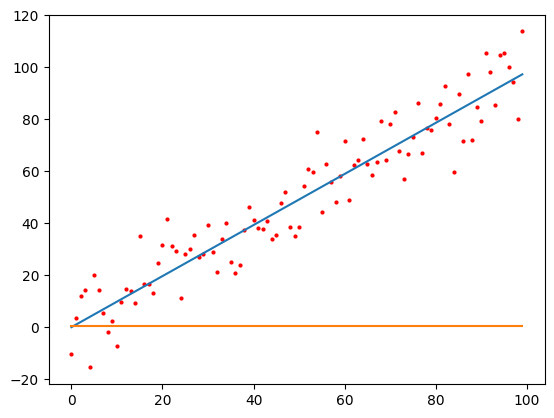

In [6]:
# Getting the data and plotting it
X, y = generateData(100)
theta = normalEq(X, y)
plotDataAndLine(X, y, theta)


# Implementation - vectorized

In [7]:
# And here is an implementation of the vectorized version
def generateData(numPoints: int):
    # we now generate X as a matrix with the bias incorporated
    bias = np.ones(numPoints)
    X = np.array([i for i in range(numPoints)])
    X = np.column_stack([X, bias])
    y = np.sum(X,axis=1) + np.random.normal(0, 10, numPoints)
    return X, y


def plotData(X, y):
    plt.plot(X[:, 0], y, "ro", markersize=2)


def plotLine(X, theta, labelUsed=""):
    plt.plot(np.linspace(0,100, num=100), np.dot(X, theta), "-", label=labelUsed)


def plotShow():
    plt.legend(loc='upper left')
    plt.show()


In [8]:
# And now computing theta
def findTheta(X, y):
    xTxInv = np.linalg.inv(np.matmul(X.T, X))
    xTy = np.matmul(X.T, y)
    theta = np.matmul(xTxInv, xTy)
    return theta


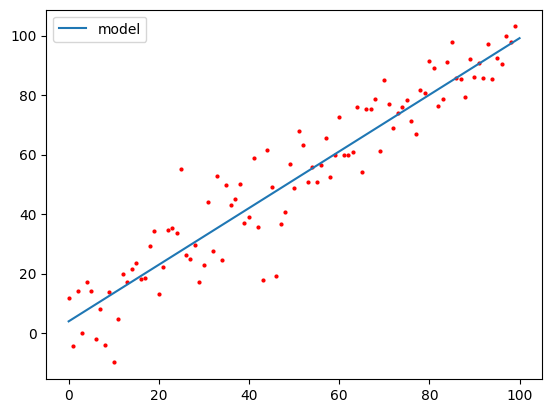

In [9]:
# And putting it all together
X, y = generateData(100)
plotData(X, y)
theta = findTheta(X, y)
plotLine(X, theta,labelUsed='model')
plotShow()


As you can see, the vectorized version is much easiser to implement, and it is also much faster. This is because we are using numpy's built-in functions, which are written in C, and are therefore much faster than our own implementations.

Next up: one more implementation, using gradient descent.

# Gradient Descent

Gradient descent is a method of finding the minimum of a function. It is an iterative method, which means that we start with an initial guess, and then we improve this guess over time.
What makes it possible: the idea that we can slowly change our weights (parameters) in a certain direction, so that we eventually reach a minimum (be it local or global).
What direction?
Calculus tells us that the direction of the steepest descent is the direction of the negative gradient. So we can use the negative gradient as a "steering wheel" to slowly change our parameters in the right direction.
So how do we find the negative gradient?
We can use the chain rule to find the derivative of the error function with respect to each parameter. This gives us the gradient of the error function.
We can then use this gradient to update our parameters, and repeat this process until we reach a minimum.

The math is simpler than before (although the algorithm is slower this way), and we have a guarantee of it working in a lot more scenarios (even with more complicated models, like the polynomial regression model we will see later).

#### Gradient descent using calculus
Remember our closed form formulas from before? We can use them to find the gradient of the error function:
$$
\frac{\partial E}{\partial a} = -2 (y_i - h(x_i))x_i
$$
$$
\frac{\partial E}{\partial b} = -2 (y_i - h(x_i))
$$
What changed? Well, instead of summing over all the errors to get the general cost function, we now care about the error each training instance provides. For each of those instances, we have 2 options:
- use it to update the weights (parameters) immediately
- use it to update the weights (parameters) after we have gone through all the training instances and averaged the results (slower, but more accurate; or rather less biased)  
- (most often used) use it to update the weights (parameters) after we have gone through **some, but not all** of the training examples, and averaged the results; this one is called **mini-batch gradient descent** (a cool middle ground between the two previous options)

**We also initially randomly pick our parameters (since we then update them over time). This is called the initialization step.** 

When we choose to calculate the gradient for each training instance, we call this method **stochastic gradient descent**. When we choose to calculate the gradient for all the training instances, we call this method **batch gradient descent**.  

We're going with the stochastic method for now, because it is faster and easier to implement. It's not that different to switch to the batch method, it's just slower and more computationally expensive. We're trading lower overfitting (or higher bias; batch learning) for faster training. The bias vs overfitting tradeoff is a common one in machine learning. We'll talk about it in another notebook.

In [10]:
def findThetaStochastic(X, y, numIterations=10, useEta=True):
    # we set a default value to 10
    # generally, we want to make sure that we at least go through all the training examples at least once (so X.size)
    # here, let's suppose that the data is quite uniform and maybe we don't even need to do that; we'll see and experiment
    eta = 0.00001
    if not useEta:
        eta = 1
    theta = np.array([np.random.random(), np.random.random()])
    for iteration in range(numIterations):
        yHat = np.dot(X[iteration], theta)
        aDeriv = -2.0 * (y[iteration] - yHat) * X[iteration][0]
        bDeriv = -2.0 * (y[iteration] - yHat)
        theta[0] -= eta * aDeriv
        theta[1] -= eta * bDeriv
    return theta


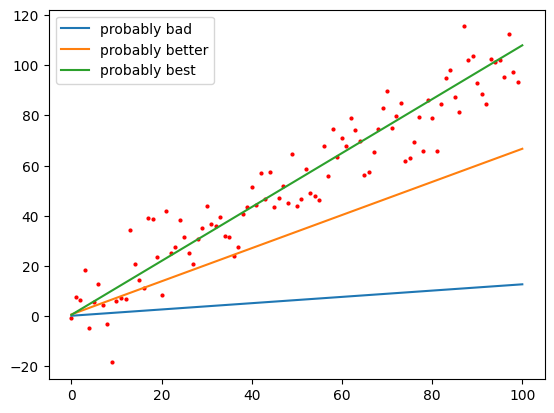

In [11]:
# And putting it all together
X, y = generateData(100)
plotData(X, y)
thetaBad = findThetaStochastic(X, y, 5)
thetaBetter = findThetaStochastic(X, y, 20)
thetaBest = findThetaStochastic(X, y, 90)
thetaWhy = findThetaStochastic(X, y, 90, useEta=False)
plotLine(X, thetaBad, "probably bad")
plotLine(X, thetaBetter, "probably better")
plotLine(X, thetaBest, "probably best")
# plotLine(X, thetaWhy, "why")
plotShow()


## Discussion

We see here that the 3 lines have a different orientation. This is because we use different parameters when we "train" our model. Instead of letting it run too much, we just let it run for a few iterations. This is because we want to see the effect of the different parameters on the model.  

What is most obvious is that letting it run as much as possible brings us to the best solution. But we also introduced **eta**. Why is that?

Running the algorithm without it would most often yield frightening results. Think about it: we have some derivatives and we subtract their values from our parameters. What if these derivatives have incredibly high values? Then our model's parameters will shoot up to the sky, and we will never reach a minimum.  

Want to test it? Uncomment the line where we plot the model without eta, and run the cell again. You will see that the model is completely off.

**One important thing to mention is that running for more iterations does not necessarily guarantee a better model; but most of the times it does perform better.**

### Trade-off

Let's talk about the number of iterations: we see that more = better. But what if we have a lot of data? We would have to run the algorithm a lot of times, and that would take a lot of time. So, bottom line:  
**More iterations = better model, but slower training**  
**Too many iterations = wasted time (can't get much better after a certain point)**  
**Too few iterations = bad model (underfitting)**  

If we were to choose batch training, instead of iterations (and eta), we would have chosen the number of epochs. An epoch is a full pass over the full training set. That's way slower, right? But it's more stable, since we average it over all the training examples.